In [1]:
from main import *
from models import *
from hyperparameter import *

# Preprocessing, Visualization, and Train/Val/Test Split

In [2]:
data_dir ='data' # Change to the path to your directory
train_images_dir = os.path.join(data_dir, 'Training')
test_images_dir = os.path.join(data_dir, 'Testing')
print(f"Data directory: {data_dir}")
print(f"Training directory: {train_images_dir}")
print(f"Testing directory: {test_images_dir}")

Data directory: data
Training directory: data/Training
Testing directory: data/Testing


In [3]:
# Load the training and test data
try:
    train_data, test_data = get_images(train_images_dir, test_images_dir)
    print("Data loading completed successfully.")
    print(f"Number of training samples: {train_data.samples}")
    print(f"Number of test samples: {test_data.samples}")
    print(f"Class names: {train_data.class_indices}")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Data loading completed successfully.
Number of training samples: 5712
Number of test samples: 1311
Class names: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [4]:
class_names_train = list(train_data.class_indices.keys())
class_names_test = list(test_data.class_indices.keys())

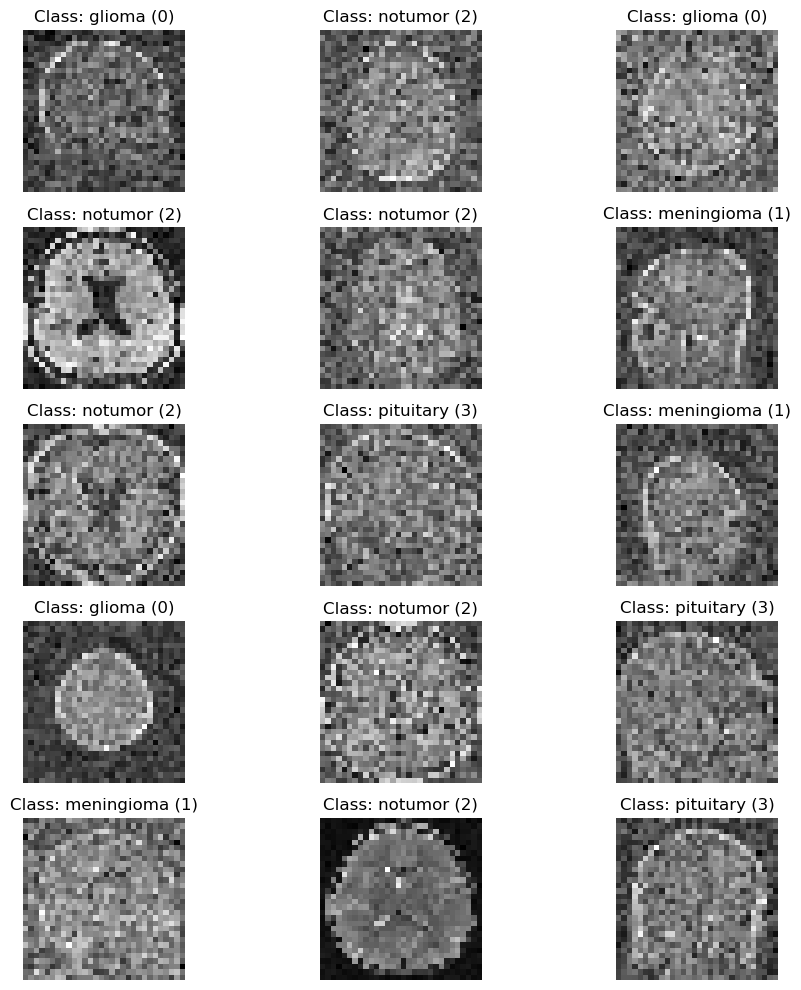

In [5]:
visualize_batch(train_data)

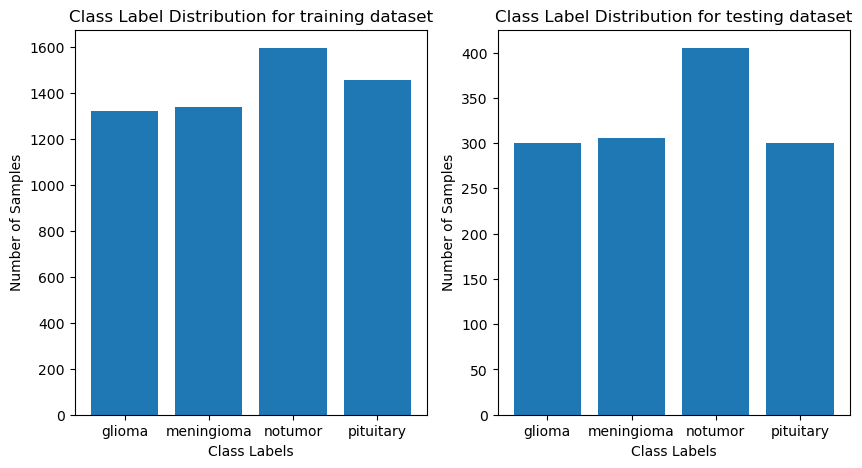

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
plot_class_dist(ax1, train_data, "training")
plot_class_dist(ax2, test_data, "testing")

In [7]:
X_train, y_train, X_val, y_val = train_val_split(train_data)
X_test, y_test = test_splits(test_data)

Number of batches in the training data: 179
Batch size of a single batch 32
Number of samples in the training dataset 5712

Number of training data batches with val split of 0.2: 144
Number of validation data batches: 35

Shape of image training set: (4608, 30, 30, 1)
Shape of image validation set: (1104, 30, 30, 1)

Shape of label training set: (4608, 4)
Shape of label validation set: (1104, 4)
Number of batches in the test data: 41
Batch size of a single batch 32
Number of samples in the test dataset 1311

Shape of image test set: (1311, 30, 30, 1)

Shape of label test set: (1311, 4)


# Baseline Model

In [8]:
base = baseline()
history = base.fit(X_train, y_train, batch_size =32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - F1Score: 0.3816 - accuracy: 0.4209 - gioma_precision: 0.4613 - gioma_recall: 0.1306 - loss: 1.1944 - meningioma_precision: 0.3595 - meningioma_recall: 0.0330 - notumor_precision: 0.7780 - notumor_recall: 0.2219 - pituitary_precision: 0.4899 - pituitary_recall: 0.1491 - val_F1Score: 0.6609 - val_accuracy: 0.6857 - val_gioma_precision: 0.6884 - val_gioma_recall: 0.6167 - val_loss: 0.8228 - val_meningioma_precision: 0.9583 - val_meningioma_recall: 0.0858 - val_notumor_precision: 0.8401 - val_notumor_recall: 0.7386 - val_pituitary_precision: 0.7967 - val_pituitary_recall: 0.6759
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - F1Score: 0.7006 - accuracy: 0.7162 - gioma_precision: 0.7349 - gioma_recall: 0.6288 - loss: 0.7642 - meningioma_precision: 0.6155 - meningioma_recall: 0.2764 - notumor_precision: 0.8887 - notumor_recall: 0.7297 - pituitary_precision: 0.7731 - pituitary_recall: 0.7589 - val_F1Score: 0.7133 - val_accuracy: 0.71

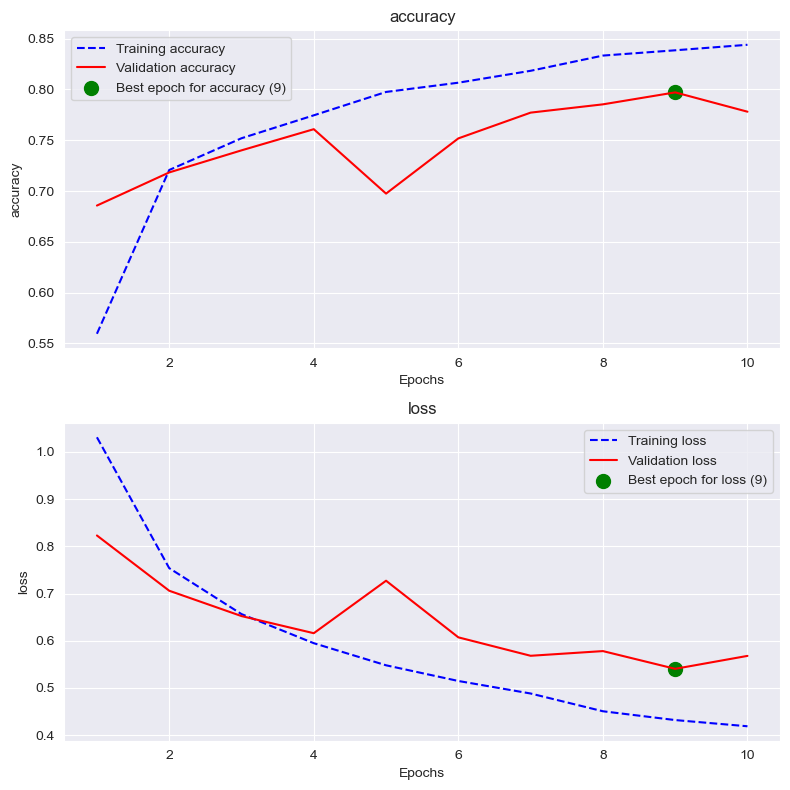

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


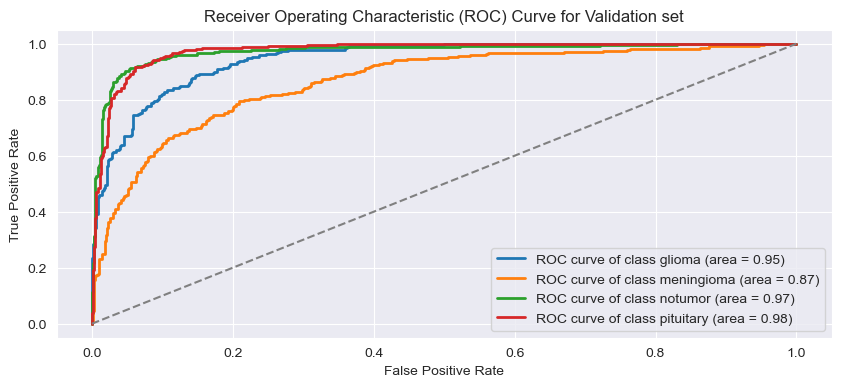

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


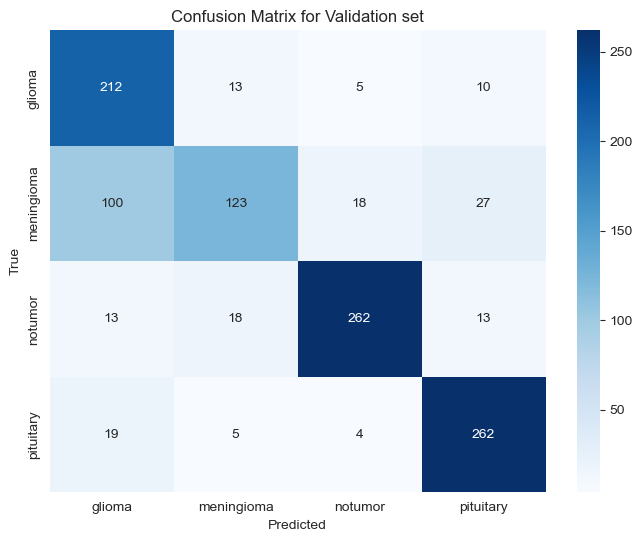

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


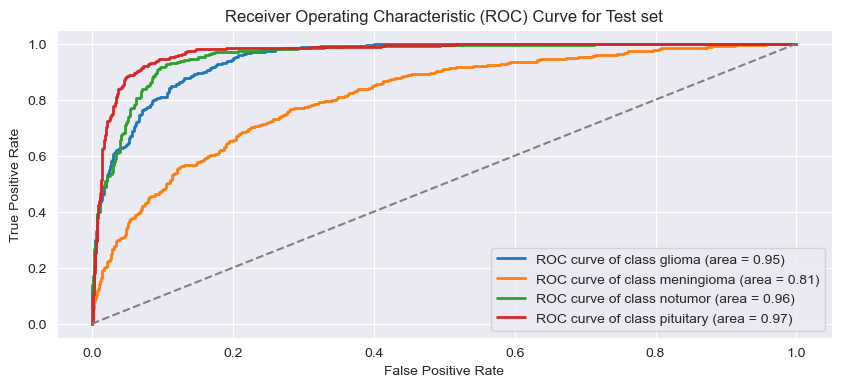

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


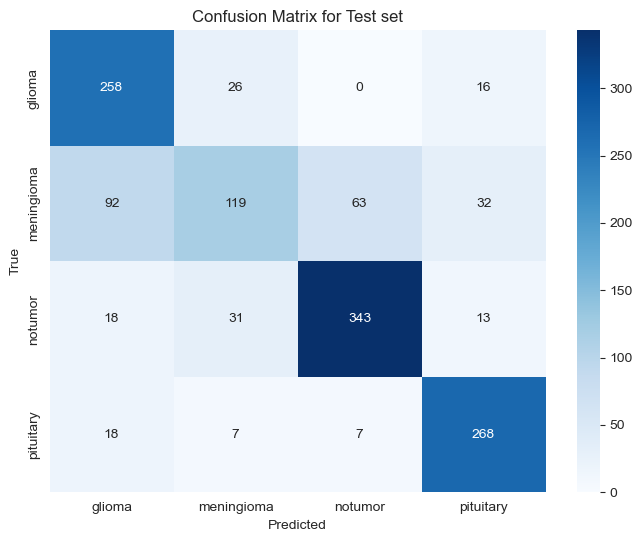

In [9]:
summarize_metric(history)

plot_roc_curve(base, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(base, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')

plot_roc_curve(base, X_test, y_test, class_names_test, title = 'Test set')
plot_confusion_matrix(base, X_test, y_test, class_names_test, normalize=False, title = 'Test set')

In [10]:
models = [base]

metrics, f1 = get_metrics(models, X_test, y_test, class_names_test)
display(metrics.rename(columns = {0: "Baselinemodel"}))
display(f1.rename(columns = {0: "F1"}))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4597 - accuracy: 0.7477 - gioma_precision: 0.8239 - gioma_recall: 0.8559 - loss: 0.6437 - meningioma_precision: 0.5467 - meningioma_recall: 0.2910 - notumor_precision: 0.4144 - notumor_recall: 0.4672 - pituitary_precision: 0.1741 - pituitary_recall: 0.2302                       


,Baselinemodel
accuracy,0.753623
gioma_precision,0.691257
gioma_recall,0.843333
meningioma_precision,0.678788
meningioma_recall,0.366013
notumor_precision,0.839506
notumor_recall,0.839506
pituitary_precision,0.833856
pituitary_recall,0.886667


,F1
glioma,0.752187
meningioma,0.486707
notumor,0.838631
pituitary,0.852146


# Convolutional Neural Network (Hyperparameter optimized)

In [11]:
cnn = cnn300k()

cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 15, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,900 (1.18 MB)

 Trainable params: 308,420 (1.18 MB)

 Non-trainable params: 480 (1.88 KB)

In [12]:
early_stopping = callbacks.EarlyStopping(monitor= 'val_loss', patience = 10, start_from_epoch= 20, restore_best_weights= True)
cnnhistory = cnn.fit(X_train, y_train, batch_size =4, epochs = 50, validation_data = (X_val, y_val), verbose = 1, callbacks= early_stopping)

Epoch 1/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - F1Score: 0.3904 - accuracy: 0.4055 - gioma_precision: 0.6399 - gioma_recall: 0.4496 - loss: 1.3618 - meningioma_precision: 0.5614 - meningioma_recall: 0.1846 - notumor_precision: 0.7330 - notumor_recall: 0.5457 - pituitary_precision: 0.7468 - pituitary_recall: 0.5490 - val_F1Score: 0.5587 - val_accuracy: 0.5707 - val_gioma_precision: 0.8235 - val_gioma_recall: 0.4083 - val_loss: 0.9898 - val_meningioma_precision: 0.6281 - val_meningioma_recall: 0.2836 - val_notumor_precision: 0.5791 - val_notumor_recall: 0.8497 - val_pituitary_precision: 0.9697 - val_pituitary_recall: 0.2207
Epoch 2/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - F1Score: 0.6117 - accuracy: 0.6281 - gioma_precision: 0.5995 - gioma_recall: 0.4330 - loss: 0.9134 - meningioma_precision: 0.5149 - meningioma_recall: 0.1876 - notumor_precision: 0.8014 - notumor_recall: 0.6596 - pituitary_precision: 0.7868 - pituitary_recall: 0.6104 - val_F1Score: 0.6996 - val_accura

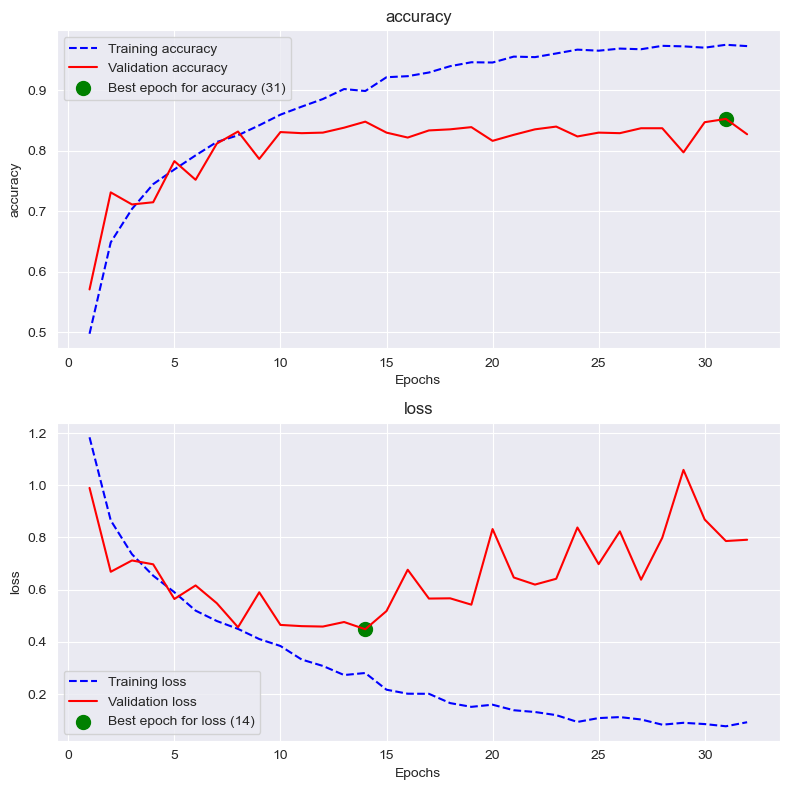

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


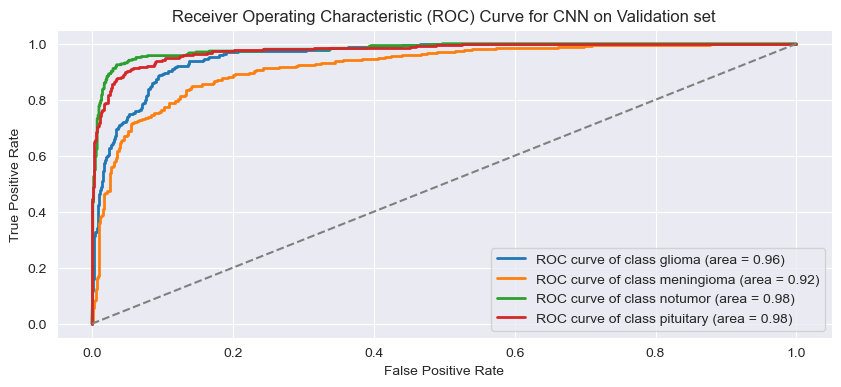

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


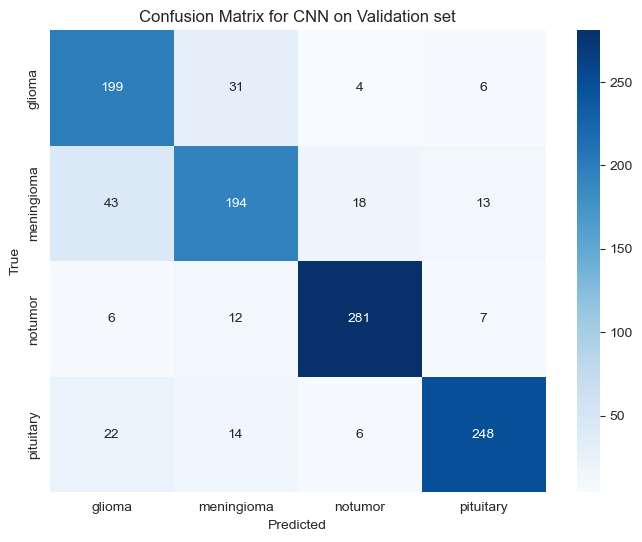

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


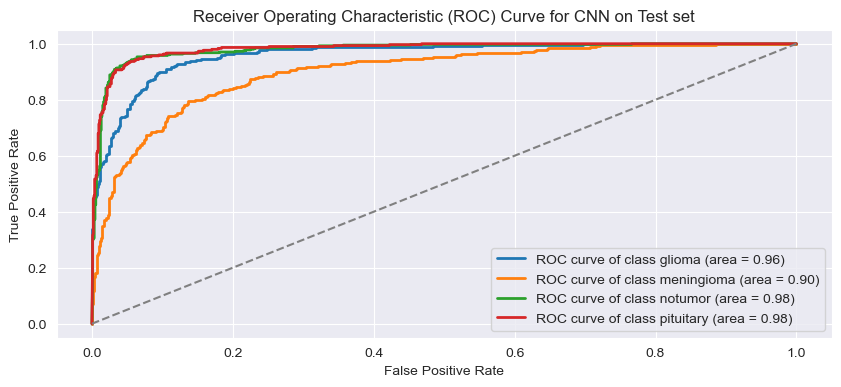

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


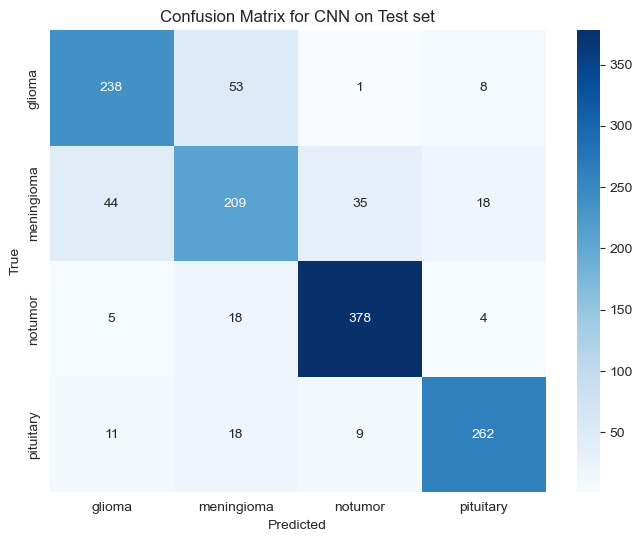

In [13]:
summarize_metric(cnnhistory)

plot_roc_curve(cnn, X_val, y_val, class_names_train, title= 'CNN on Validation set')
plot_confusion_matrix(cnn, X_val, y_val, class_names_train, normalize=False, title = 'CNN on Validation set')

plot_roc_curve(cnn, X_test, y_test, class_names_test, title = 'CNN on Test set')
plot_confusion_matrix(cnn, X_test, y_test, class_names_test, normalize=False, title = 'CNN on Test set')

# Transfer learning

### VGG16

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - F1Score: 0.4760 - accuracy: 0.4960 - gioma_precision: 0.8065 - gioma_recall: 0.2985 - loss: 1.1679 - meningioma_precision: 0.6948 - meningioma_recall: 0.3504 - notumor_precision: 0.8681 - notumor_recall: 0.5867 - pituitary_precision: 0.8318 - pituitary_recall: 0.5110 - val_F1Score: 0.6299 - val_accuracy: 0.6377 - val_gioma_precision: 0.7500 - val_gioma_recall: 0.1500 - val_loss: 0.8863 - val_meningioma_precision: 0.6042 - val_meningioma_recall: 0.3246 - val_notumor_precision: 0.8724 - val_notumor_recall: 0.6928 - val_pituitary_precision: 0.8011 - val_pituitary_recall: 0.5138
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - F1Score: 0.6354 - accuracy: 0.6460 - gioma_precision: 0.6874 - gioma_recall: 0.3389 - loss: 0.8545 - meningioma_precision: 0.6153 - meningioma_recall: 0.2511 - notumor_precision: 0.8686 - notumor_recall: 0.7164 - pituitary_precision: 0.7230 - pituitary_recall: 0.5644 - val_F1Score: 0.6576 - val_accuracy: 0

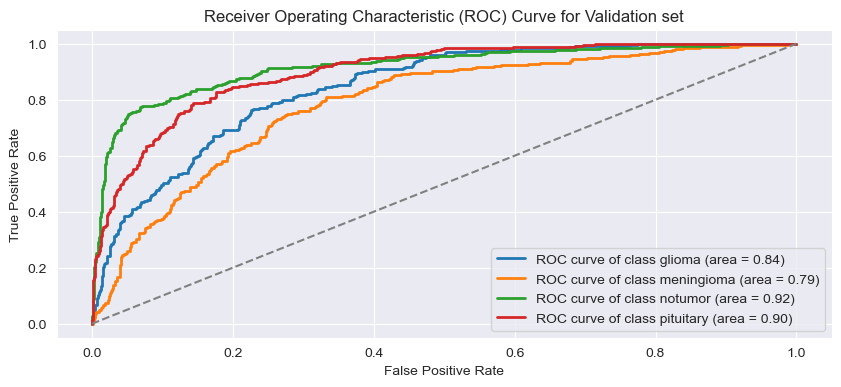

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


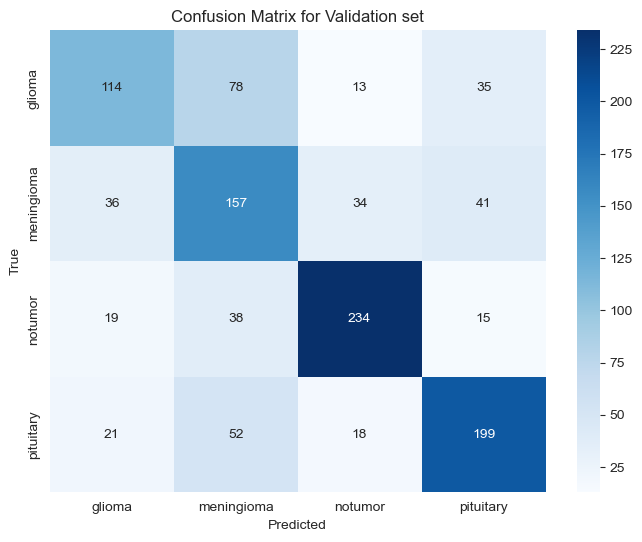

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16

resolution=32

vgg16_model = transfer_learning(VGG16, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam")

plot_roc_curve(vgg16_model, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(vgg16_model, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - F1Score: 0.3686 - accuracy: 0.3954 - gioma_precision: 0.6398 - gioma_recall: 0.2065 - loss: 1.2899 - meningioma_precision: 0.6305 - meningioma_recall: 0.1758 - notumor_precision: 0.8106 - notumor_recall: 0.4479 - pituitary_precision: 0.7928 - pituitary_recall: 0.3028 - val_F1Score: 0.5554 - val_accuracy: 0.5833 - val_gioma_precision: 0.6667 - val_gioma_recall: 0.0167 - val_loss: 0.9506 - val_meningioma_precision: 0.6429 - val_meningioma_recall: 0.1007 - val_notumor_precision: 0.7075 - val_notumor_recall: 0.8301 - val_pituitary_precision: 0.8155 - val_pituitary_recall: 0.4724
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - F1Score: 0.5968 - accuracy: 0.6190 - gioma_precision: 0.6176 - gioma_recall: 0.2043 - loss: 0.9434 - meningioma_precision: 0.6733 - meningioma_recall: 0.1543 - notumor_precision: 0.8124 - notumor_recall: 0.7138 - pituitary_precision: 0.7210 - pituitary_recall: 0.5453 - val_F1Score: 0.6445 - val_accuracy: 0

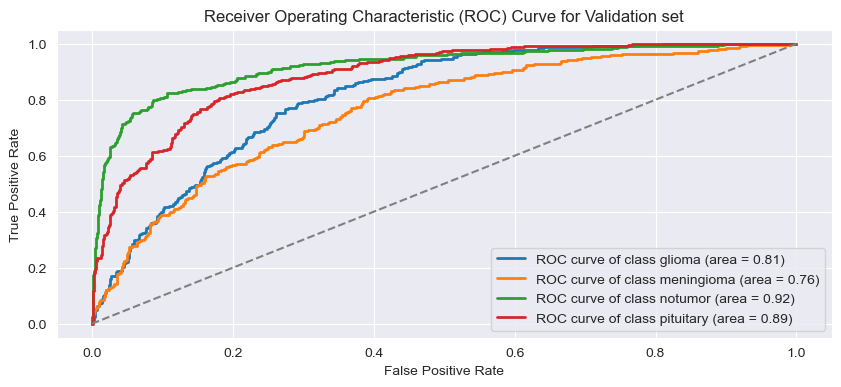

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


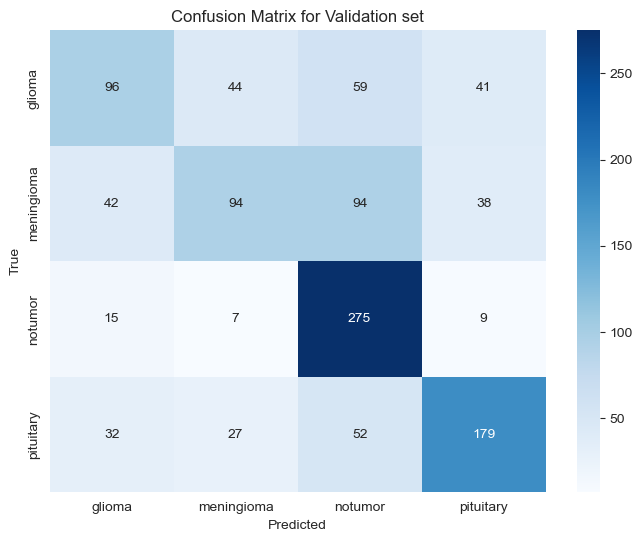

In [15]:
# VGG16 with two dense 
resolution=32

vgg16_model1 = transfer_learning(VGG16, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam", add_extra_layer=True)

plot_roc_curve(vgg16_model1, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(vgg16_model1, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


### Resnet50

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - F1Score: 0.3278 - accuracy: 0.3333 - gioma_precision: 0.5990 - gioma_recall: 0.1336 - loss: 1.4599 - meningioma_precision: 0.4497 - meningioma_recall: 0.2957 - notumor_precision: 0.7361 - notumor_recall: 0.4046 - pituitary_precision: 0.7474 - pituitary_recall: 0.2902 - val_F1Score: 0.3903 - val_accuracy: 0.4022 - val_gioma_precision: 0.4568 - val_gioma_recall: 0.3083 - val_loss: 1.2375 - val_meningioma_precision: 0.6000 - val_meningioma_recall: 0.0784 - val_notumor_precision: 0.9189 - val_notumor_recall: 0.1111 - val_pituitary_precision: 0.5000 - val_pituitary_recall: 0.0069
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - F1Score: 0.4461 - accuracy: 0.4608 - gioma_precision: 0.5263 - gioma_recall: 0.1699 - loss: 1.1942 - meningioma_precision: 0.7019 - meningioma_recall: 0.0754 - notumor_precision: 0.7233 - notumor_recall: 0.3358 - pituitary_precision: 0.5667 - pituitary_recall: 0.2206 - val_F1Score: 0.2982 - val_accuracy: 0.

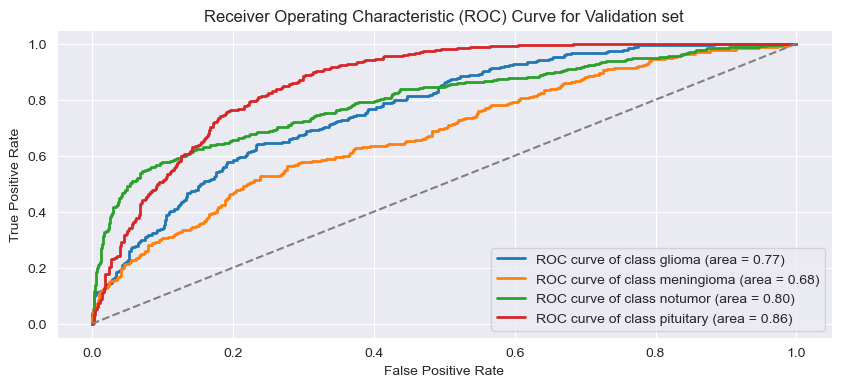

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


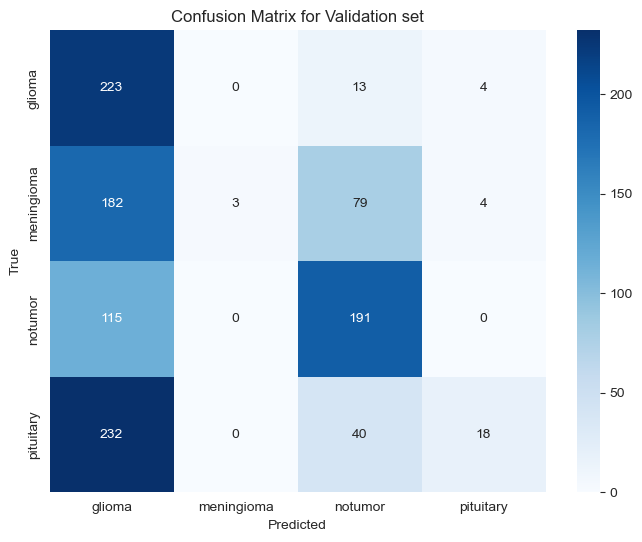

In [16]:
from tensorflow.keras.applications import ResNet50

resolution=32

resnet_model = transfer_learning(ResNet50, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam")

plot_roc_curve(resnet_model, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(resnet_model, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - F1Score: 0.2614 - accuracy: 0.2736 - gioma_precision: 0.2389 - gioma_recall: 0.0100 - loss: 1.4397 - meningioma_precision: 0.5121 - meningioma_recall: 0.0861 - notumor_precision: 0.5816 - notumor_recall: 0.3518 - pituitary_precision: 0.6563 - pituitary_recall: 0.0824 - val_F1Score: 0.2812 - val_accuracy: 0.3442 - val_gioma_precision: 0.0000e+00 - val_gioma_recall: 0.0000e+00 - val_loss: 1.3202 - val_meningioma_precision: 0.0000e+00 - val_meningioma_recall: 0.0000e+00 - val_notumor_precision: 0.7807 - val_notumor_recall: 0.2908 - val_pituitary_precision: 0.0000e+00 - val_pituitary_recall: 0.0000e+00
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - F1Score: 0.3328 - accuracy: 0.3693 - gioma_precision: 0.0661 - gioma_recall: 2.7042e-04 - loss: 1.2980 - meningioma_precision: 0.0000e+00 - meningioma_recall: 0.0000e+00 - notumor_precision: 0.7044 - notumor_recall: 0.2110 - pituitary_precision: 0.0000e+00 - pituitary_recall: 0.0000e

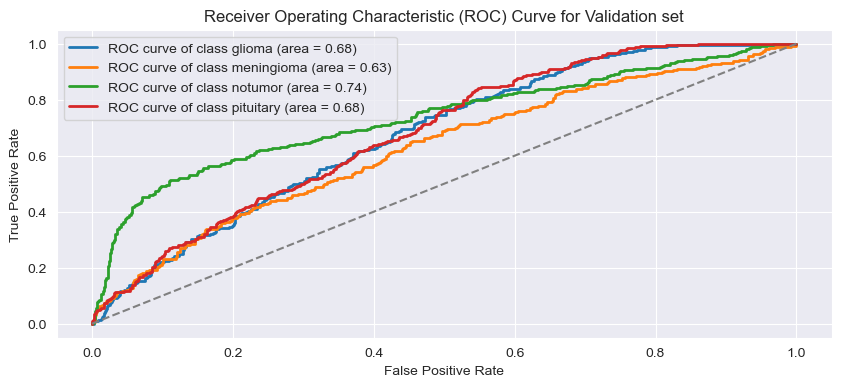

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


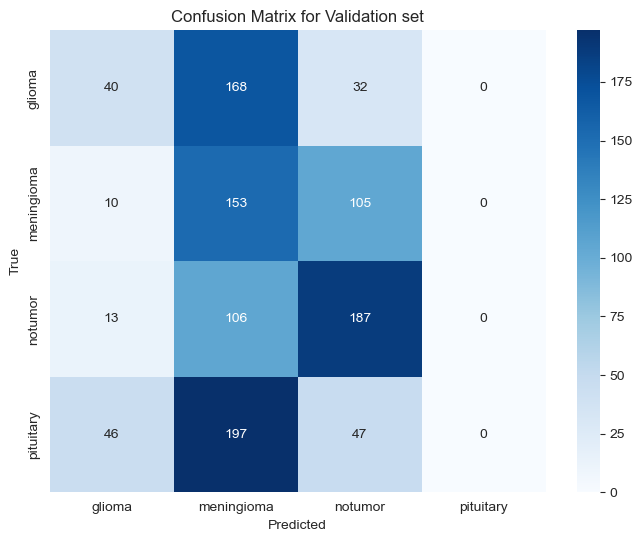

In [17]:
# Resnet50 with two dense layers

resolution=32

resnet_model1 = transfer_learning(ResNet50, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam", add_extra_layer=True)

plot_roc_curve(resnet_model1, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(resnet_model1, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


### Densenet 

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - F1Score: 0.5081 - accuracy: 0.5205 - gioma_precision: 0.5099 - gioma_recall: 0.1693 - loss: 1.1525 - meningioma_precision: 0.4965 - meningioma_recall: 0.1468 - notumor_precision: 0.7712 - notumor_recall: 0.4924 - pituitary_precision: 0.6774 - pituitary_recall: 0.3268 - val_F1Score: 0.6363 - val_accuracy: 0.6431 - val_gioma_precision: 0.5361 - val_gioma_recall: 0.4333 - val_loss: 0.8328 - val_meningioma_precision: 0.5455 - val_meningioma_recall: 0.2463 - val_notumor_precision: 0.9025 - val_notumor_recall: 0.6961 - val_pituitary_precision: 0.8211 - val_pituitary_recall: 0.6172
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - F1Score: 0.6656 - accuracy: 0.6829 - gioma_precision: 0.6821 - gioma_recall: 0.4791 - loss: 0.7642 - meningioma_precision: 0.6556 - meningioma_recall: 0.2971 - notumor_precision: 0.8674 - notumor_recall: 0.7719 - pituitary_precision: 0.7906 - pituitary_recall: 0.6864 - val_F1Score: 0.6141 - val_accuracy: 0

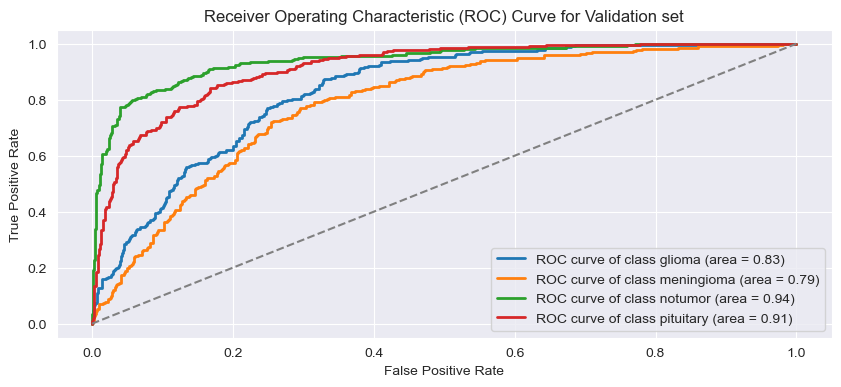

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


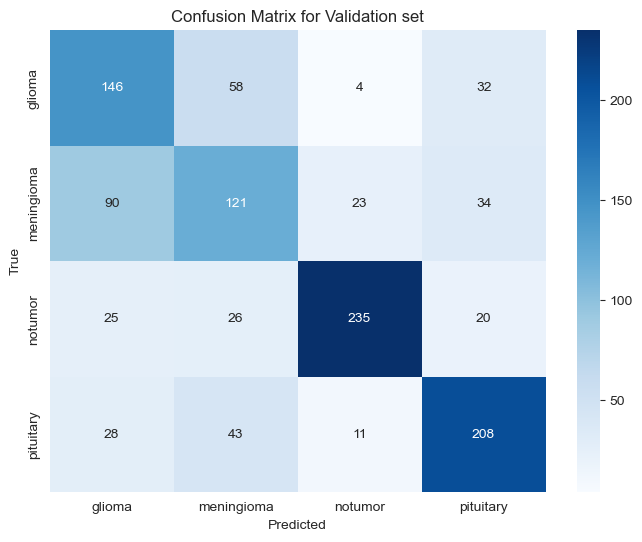

In [18]:
from tensorflow.keras.applications import DenseNet121

resolution=32

densenet_model = transfer_learning(DenseNet121, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam")

plot_roc_curve(densenet_model, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(densenet_model, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - F1Score: 0.4462 - accuracy: 0.4560 - gioma_precision: 0.5400 - gioma_recall: 0.2836 - loss: 1.2292 - meningioma_precision: 0.5080 - meningioma_recall: 0.2731 - notumor_precision: 0.8109 - notumor_recall: 0.5648 - pituitary_precision: 0.7570 - pituitary_recall: 0.4136 - val_F1Score: 0.5528 - val_accuracy: 0.6051 - val_gioma_precision: 0.6250 - val_gioma_recall: 0.2500 - val_loss: 0.8979 - val_meningioma_precision: 0.7857 - val_meningioma_recall: 0.0410 - val_notumor_precision: 0.8020 - val_notumor_recall: 0.7810 - val_pituitary_precision: 0.7470 - val_pituitary_recall: 0.6414
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - F1Score: 0.5854 - accuracy: 0.6083 - gioma_precision: 0.5847 - gioma_recall: 0.3272 - loss: 0.8926 - meningioma_precision: 0.5595 - meningioma_recall: 0.1933 - notumor_precision: 0.8198 - notumor_recall: 0.7045 - pituitary_precision: 0.7233 - pituitary_recall: 0.5804 - val_F1Score: 0.6263 - val_accuracy: 0

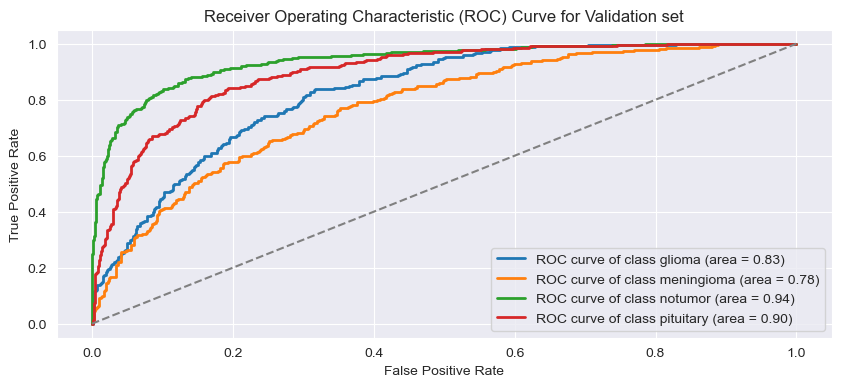

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


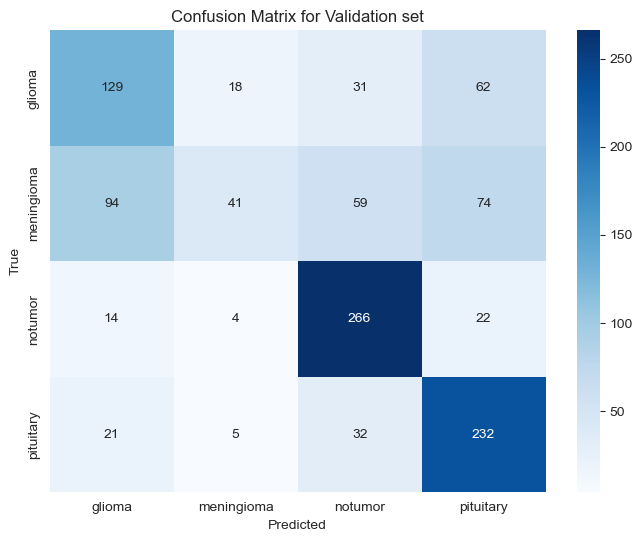

In [19]:
# Densenet with two dense layers
resolution=32

densenet_model1 = transfer_learning(DenseNet121, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam", add_extra_layer=True)

plot_roc_curve(densenet_model1, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(densenet_model1, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


### EfficientNet

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - F1Score: 0.2249 - accuracy: 0.2657 - gioma_precision: 0.5236 - gioma_recall: 0.1924 - loss: 1.4251 - meningioma_precision: 0.6460 - meningioma_recall: 0.1095 - notumor_precision: 0.7534 - notumor_recall: 0.3443 - pituitary_precision: 0.8032 - pituitary_recall: 0.2742 - val_F1Score: 0.0977 - val_accuracy: 0.2428 - val_gioma_precision: 0.0000e+00 - val_gioma_recall: 0.0000e+00 - val_loss: 1.3926 - val_meningioma_precision: 0.0000e+00 - val_meningioma_recall: 0.0000e+00 - val_notumor_precision: 0.0000e+00 - val_notumor_recall: 0.0000e+00 - val_pituitary_precision: 0.0000e+00 - val_pituitary_recall: 0.0000e+00
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - F1Score: 0.1874 - accuracy: 0.2756 - gioma_precision: 0.0000e+00 - gioma_recall: 0.0000e+00 - loss: 1.3926 - meningioma_precision: 0.0000e+00 - meningioma_recall: 0.0000e+00 - notumor_precision: 0.0000e+00 - notumor_recall: 0

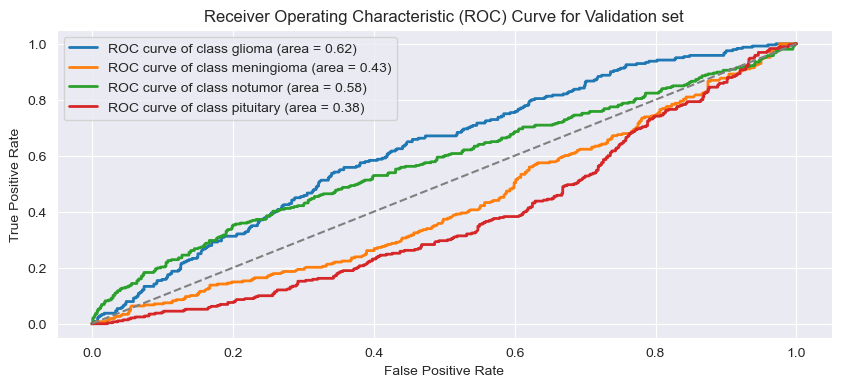

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


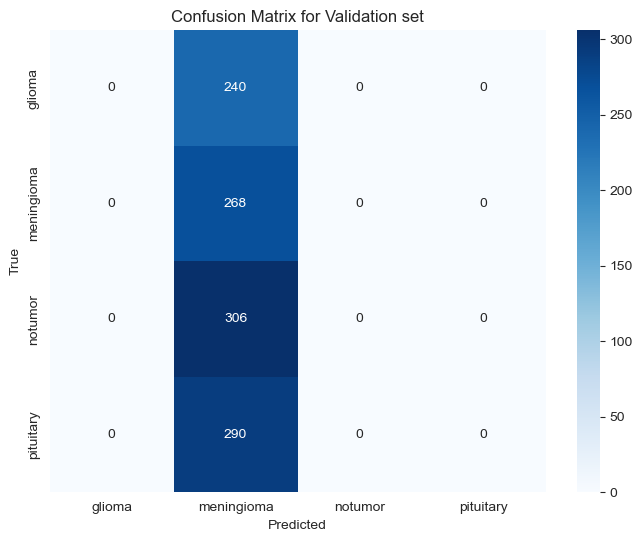

In [20]:
from tensorflow.keras.applications import EfficientNetB0

resolution=32

efficientnet_model = transfer_learning(EfficientNetB0, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam")

plot_roc_curve(efficientnet_model, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(efficientnet_model, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


### EfficientNet80B with two dense layers

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - F1Score: 0.2350 - accuracy: 0.2636 - gioma_precision: 0.0000e+00 - gioma_recall: 0.0000e+00 - loss: 1.4121 - meningioma_precision: 0.0000e+00 - meningioma_recall: 0.0000e+00 - notumor_precision: 0.1106 - notumor_recall: 0.0026 - pituitary_precision: 0.0000e+00 - pituitary_recall: 0.0000e+00 - val_F1Score: 0.1040 - val_accuracy: 0.2627 - val_gioma_precision: 0.0000e+00 - val_gioma_recall: 0.0000e+00 - val_loss: 1.3842 - val_meningioma_precision: 0.0000e+00 - val_meningioma_recall: 0.0000e+00 - val_notumor_precision: 0.0000e+00 - val_notumor_recall: 0.0000e+00 - val_pituitary_precision: 0.0000e+00 - val_pituitary_recall: 0.0000e+00
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - F1Score: 0.1469 - accuracy: 0.2754 - gioma_precision: 0.0000e+00 - gioma_recall: 0.0000e+00 - loss: 1.3864 - meningioma_precision: 0.0000e+00 - meningioma_recall: 0.0000e+00 - notumor_precision: 0.0000e+00 - notumor_recall: 0.0000e+00 - pituitary_preci

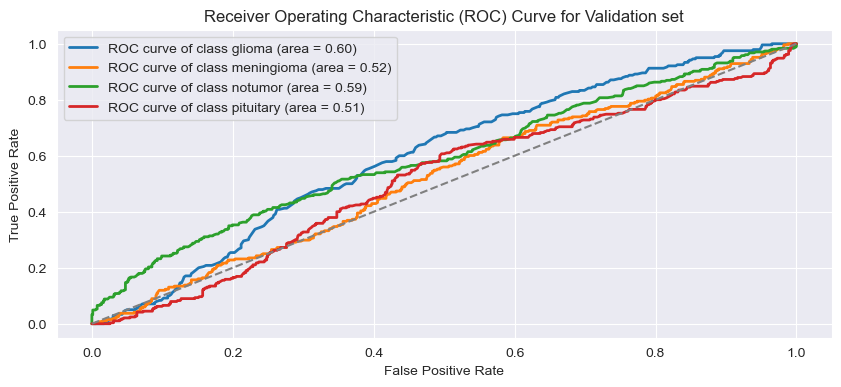

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


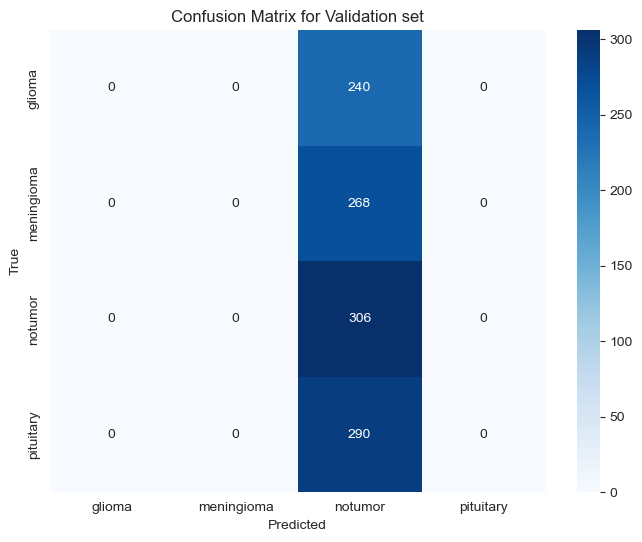

In [21]:
resolution=32

efficientnet_model1 = transfer_learning(EfficientNetB0, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam", add_extra_layer=True)

plot_roc_curve(efficientnet_model1, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(efficientnet_model1, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


## Transfer learning results (without any finetuning)

In [22]:
models = [vgg16_model, resnet_model, densenet_model, efficientnet_model, vgg16_model1, resnet_model1, densenet_model1, efficientnet_model1]

metrics, f1 = get_metrics(models, X_val, y_val, class_names_train)
display(metrics.rename(columns = {0: "VGG16", 1: "Resnet50", 2: "Densenet121", 3: "EfficientNetB0", 4: "VGG16 (2 layers)", 5: "Resnet50 (2 layers)", 6: "Densenet121 (2 layers)", 7: "EfficientNetB0 (2 layers)"}))
display(f1.rename(columns =  {0: "VGG16", 1: "Resnet50", 2: "Densenet121", 3: "EfficientNetB0", 4: "VGG16 (2 layers)", 5: "Resnet50 (2 layers)", 6: "Densenet121 (2 layers)", 7: "EfficientNetB0 (2 layers)"}))

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - F1Score: 0.6374 - accuracy: 0.6499 - gioma_precision: 0.7566 - gioma_recall: 0.1084 - loss: 0.8597 - meningioma_precision: 0.6476 - meningioma_recall: 0.3109 - notumor_precision: 0.8888 - notumor_recall: 0.7139 - pituitary_precision: 0.7512 - pituitary_recall: 0.5220
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - F1Score: 0.3024 - accuracy: 0.4089 - gioma_precision: 0.3399 - gioma_recall: 0.7029 - loss: 1.2340 - meningioma_precision: 0.0000e+00 - meningioma_recall: 0.0000e+00 - notumor_precision: 0.7925 - notumor_recall: 0.4983 - pituitary_precision: 0.0000e+00 - pituitary_recall: 0.0000e+00
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - F1Score: 0.6492 - accuracy: 0.6569 - gioma_precision: 0.5700 - gioma_recall: 0.4429 - loss: 0.8051 - meningioma_precision: 0.5730 - meningioma_recall: 0.2714 - notumor_precision: 0.9079 - notumor_recall: 0.7018 - pituitary_precision: 0.8302 - pituitary_recall: 0.6652
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - F1Score: 0.0

,VGG16,Resnet50,Densenet121,EfficientNetB0,VGG16 (2 layers),Resnet50 (2 layers),Densenet121 (2 layers),EfficientNetB0 (2 layers)
accuracy,0.637681,0.394022,0.643116,0.242754,0.583333,0.344203,0.605072,0.277174
gioma_precision,0.750000,0.348249,0.536082,0.000000,0.666667,0.000000,0.625000,0.000000
gioma_recall,0.150000,0.745833,0.433333,0.000000,0.016667,0.000000,0.250000,0.000000
meningioma_precision,0.604167,0.000000,0.545455,0.000000,0.642857,0.000000,0.785714,0.000000
meningioma_recall,0.324627,0.000000,0.246269,0.000000,0.100746,0.000000,0.041045,0.000000
notumor_precision,0.872428,0.782383,0.902542,0.000000,0.707521,0.780702,0.802013,0.000000
notumor_recall,0.692810,0.493464,0.696078,0.000000,0.830065,0.290850,0.781046,0.000000
pituitary_precision,0.801075,0.000000,0.821101,0.000000,0.815476,0.000000,0.746988,0.000000
pituitary_recall,0.513793,0.000000,0.617241,0.000000,0.472414,0.000000,0.641379,0.000000


,VGG16,Resnet50,Densenet121,EfficientNetB0,VGG16 (2 layers),Resnet50 (2 layers),Densenet121 (2 layers),EfficientNetB0 (2 layers)
glioma,0.530232,0.449597,0.551985,0.000000,0.451765,0.229226,0.518072,0.000000
meningioma,0.529511,0.022140,0.468992,0.390671,0.427273,0.343049,0.244048,0.000000
notumor,0.773554,0.607313,0.811744,0.000000,0.699745,0.552437,0.766571,0.434043
pituitary,0.686207,0.113924,0.712329,0.000000,0.642729,0.000000,0.682353,0.000000


# Custom model with VGG16 initial weights and convolution blocks
During transfer learning we noticed that the shallow networks work best and we can further improve accuracy by adding a few convolution blocks at the end of the first few layers of VGG16, this helps in capturing the general features from pretrained model and train the model to our special domain

In [23]:
custom_vgg = custom_vgg16()
early_stopping = callbacks.EarlyStopping(monitor= 'val_loss', patience = 3, start_from_epoch= 8, restore_best_weights= True)
vgg_history = custom_vgg.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val), verbose = 1, callbacks= early_stopping)

Model: "functional_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,735,488 (6.62 MB)

 Trainable params: 1,735,488 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 30, 30, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_16 (Lambda)              │ (None, 30, 30, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_17 (Lambda)              │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_80 (Functional)      │ (None, 4, 4, 256)      │     1,735,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 32)       │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,822,708 (6.95 MB)

 Trainable params: 1,822,708 (6.95 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - F1Score: 0.2456 - accuracy: 0.2847 - gioma_precision: 0.1814 - gioma_recall: 0.0214 - loss: 2.8828 - meningioma_precision: 0.2296 - meningioma_recall: 0.0186 - notumor_precision: 0.1654 - notumor_recall: 0.0097 - pituitary_precision: 0.3206 - pituitary_recall: 0.0298 - val_F1Score: 0.5351 - val_accuracy: 0.5498 - val_gioma_precision: 0.5385 - val_gioma_recall: 0.0292 - val_loss: 1.0918 - val_meningioma_precision: 0.3750 - val_meningioma_recall: 0.0112 - val_notumor_precision: 0.7090 - val_notumor_recall: 0.6209 - val_pituitary_precision: 0.8197 - val_pituitary_recall: 0.3448
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - F1Score: 0.5609 - accuracy: 0.5835 - gioma_precision: 0.5930 - gioma_recall: 0.2908 - loss: 0.9777 - meningioma_precision: 0.4084 - meningioma_recall: 0.1303 - notumor_precision: 0.7893 - notumor_recall: 0.5980 - pituitary_precision: 0.7289 - pituitary_recall: 0.5483 - val_F1Score: 0.5883 - val_accuracy

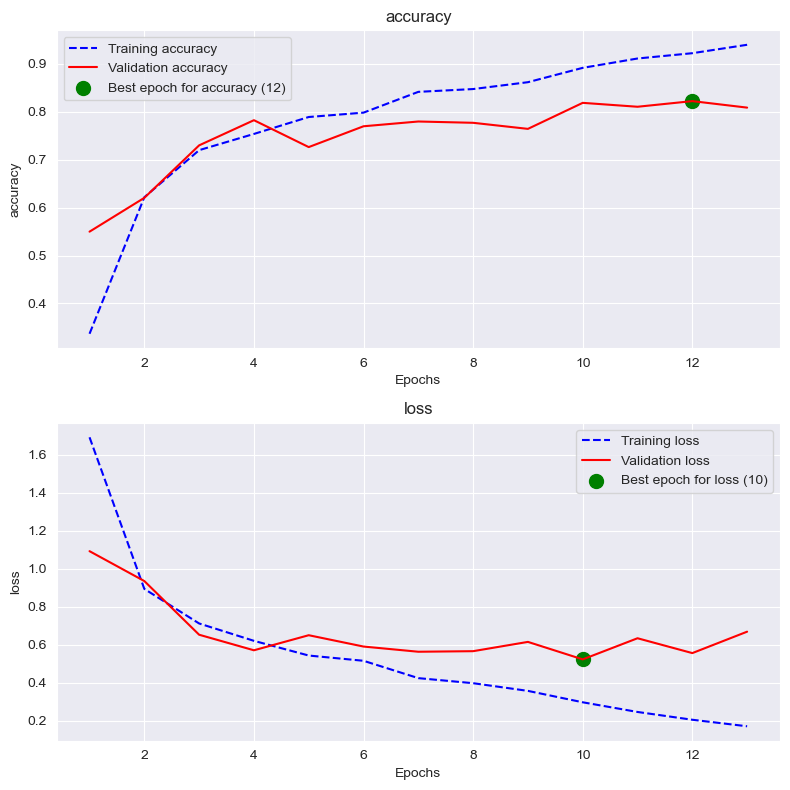

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


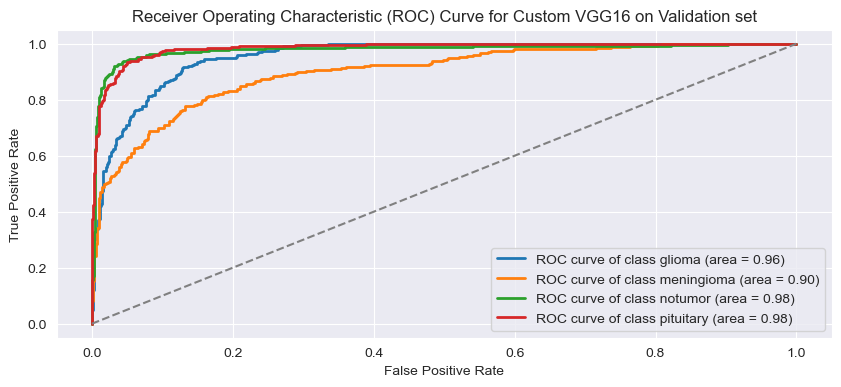

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


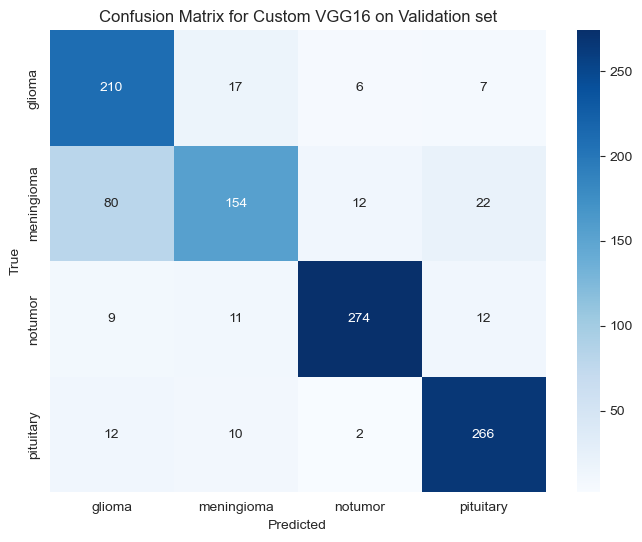

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


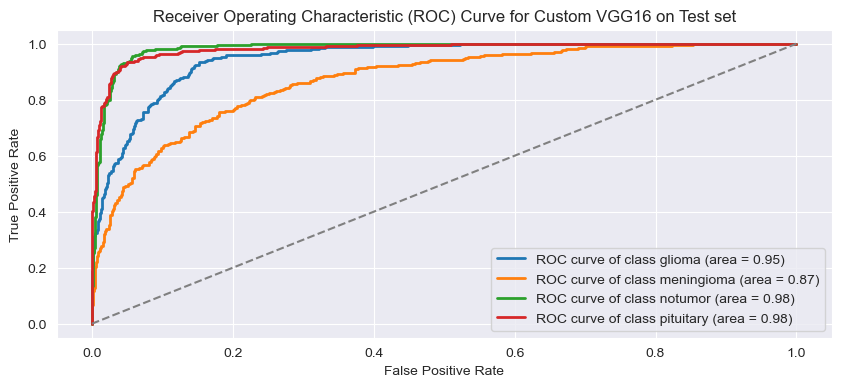

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


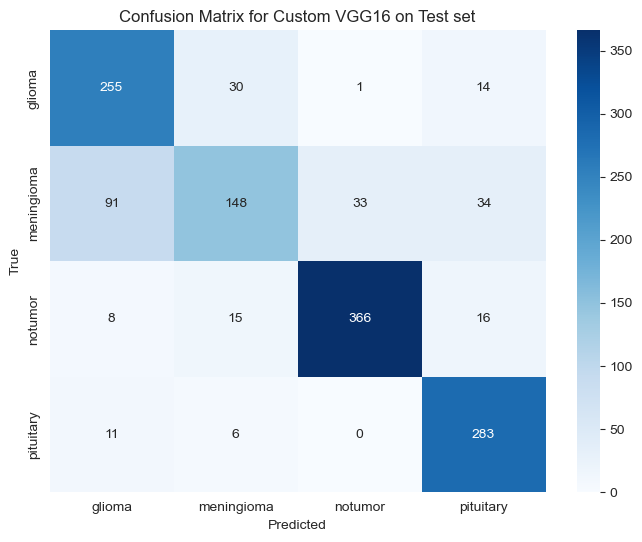

In [24]:
summarize_metric(vgg_history)

plot_roc_curve(custom_vgg, X_val, y_val, class_names_train, title= 'Custom VGG16 on Validation set')
plot_confusion_matrix(custom_vgg, X_val, y_val, class_names_train, normalize=False, title = 'Custom VGG16 on Validation set')

plot_roc_curve(custom_vgg, X_test, y_test, class_names_test, title = 'Custom VGG16 on Test set')
plot_confusion_matrix(custom_vgg, X_test, y_test, class_names_test, normalize=False, title = 'Custom VGG16 on Test set')

# Final Model Comparison

In [25]:
models = [base, cnn, custom_vgg]

metrics, f1 = get_metrics(models, X_test, y_test, class_names_test)
display(metrics.rename(columns = {0: "Baselinemodel", 1: "CNN300k", 2: "Custom VGG16"}))
display(f1.rename(columns = {0: "Baselinemodel F1", 1: "CNN300k F1", 2: "Custom VGG16 F1"}))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4597 - accuracy: 0.7477 - gioma_precision: 0.8239 - gioma_recall: 0.8559 - loss: 0.6437 - meningioma_precision: 0.5467 - meningioma_recall: 0.2910 - notumor_precision: 0.4144 - notumor_recall: 0.4672 - pituitary_precision: 0.1741 - pituitary_recall: 0.2302                       
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - F1Score: 0.5170 - accuracy: 0.8040 - gioma_precision: 0.8957 - gioma_recall: 0.8008 - loss: 0.7301 - meningioma_precision: 0.5589 - meningioma_recall: 0.5150 - notumor_precision: 0.4632 - notumor_recall: 0.5280 - pituitary_precision: 0.1993 - pituitary_recall: 0.2199                
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - F1Score: 0.4924 - accuracy: 0.7744 - gioma_precision: 0.8259 - gioma_recall: 0.8228 - loss: 0.6082 - meningioma_precision: 0.5970 - meningioma_recall: 0.3969 - notumor_precision: 0.4739 - notumor_recall: 0.5014 - pituitary_precision: 0.1750 - pituitary_recall: 0.2318        


,Baselinemodel,CNN300k,Custom VGG16
accuracy,0.753623,0.829138,0.802441
gioma_precision,0.691257,0.810345,0.703704
gioma_recall,0.843333,0.783333,0.823333
meningioma_precision,0.678788,0.717770,0.765625
meningioma_recall,0.366013,0.673203,0.480392
notumor_precision,0.839506,0.893112,0.923274
notumor_recall,0.839506,0.928395,0.891358
pituitary_precision,0.833856,0.903114,0.843373
pituitary_recall,0.886667,0.870000,0.933333


,Baselinemodel F1,CNN300k F1,Custom VGG16 F1
glioma,0.752187,0.795987,0.766917
meningioma,0.486707,0.692053,0.586139
notumor,0.838631,0.913043,0.909317
pituitary,0.852146,0.885135,0.874807


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


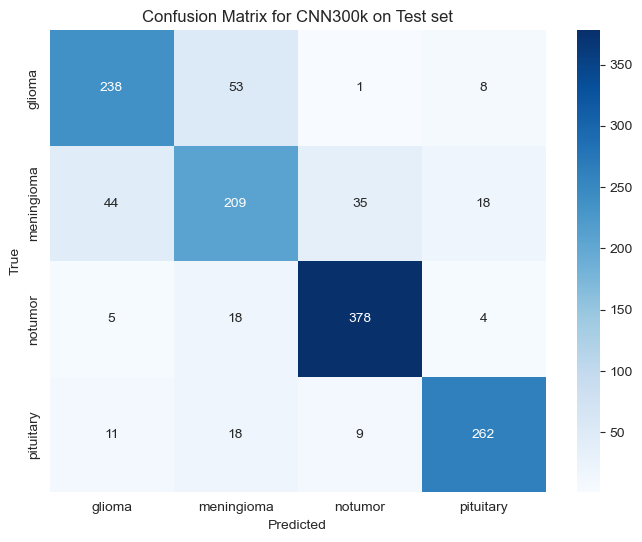

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


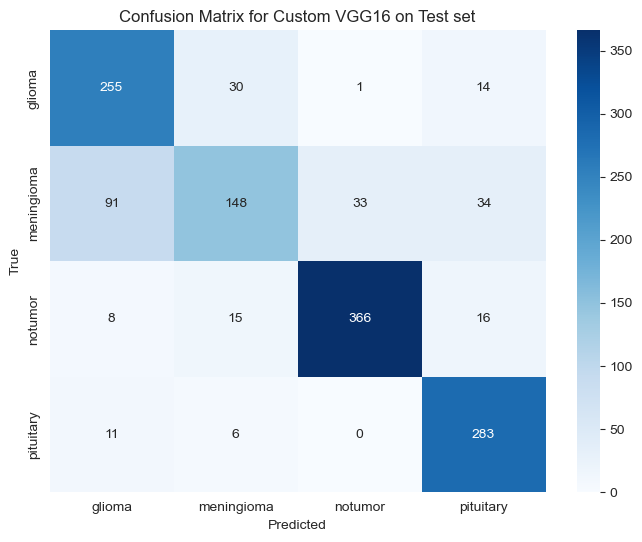

In [26]:
plot_confusion_matrix(cnn, X_test, y_test, class_names_test, normalize=False, title = 'CNN300k on Test set')
plot_confusion_matrix(custom_vgg, X_test, y_test, class_names_test, normalize=False, title = 'Custom VGG16 on Test set')